<a href="https://colab.research.google.com/github/Theophine/Time-series-forecasting-/blob/main/forecast_wikipedia_page_view.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem statement:

We are given log daily page views for the Wikipedia page for Peyton Manning. Our task is to predict the future log daily view for wikipedia pages. 

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# import all libraries and dependencies for data visualization
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')
sns.set(style='darkgrid')

from sklearn import preprocessing    #for scaling 
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wiki_data.csv to wiki_data.csv


In [3]:
import pandas as pd
import io
wiki_data = pd.read_csv(io.BytesIO(uploaded['wiki_data.csv']))

In [4]:
wiki_data.head()

,ds,y
0,10/12/2007,9.590761
1,11/12/2007,8.519590
2,12/12/2007,8.183677
3,13/12/2007,8.072467
4,14/12/2007,7.893572


In [19]:
wiki_data.shape

(2905, 2)

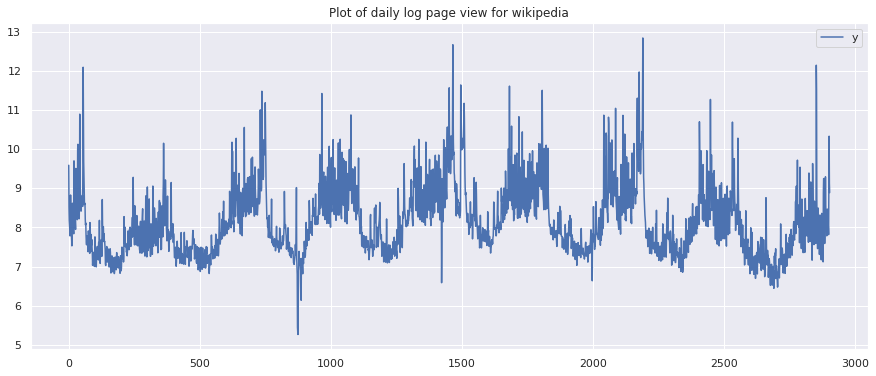

In [9]:
wiki_data.plot(figsize = (15, 6))
plt.title('Plot of daily log page view for wikipedia')
plt.show();

In [16]:
#import your model
from fbprophet import Prophet

In [17]:
#instantiate your model
model = Prophet()

In [18]:
#you fit your  model
prophet_model = model.fit(wiki_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
#make future dataframe for forecasting
df_future = model.make_future_dataframe(periods = 180, freq = 'D')
forecast = prophet_model.predict(df_future)

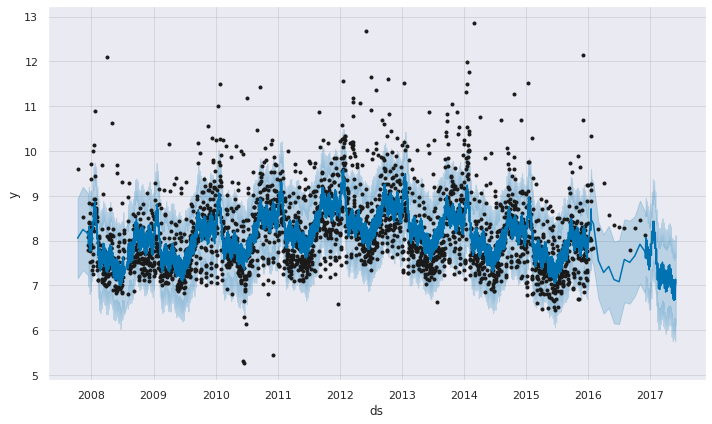

In [24]:
#plot your model which contains in-sample and future forecast
prophet_model.plot(forecast)
plt.show();

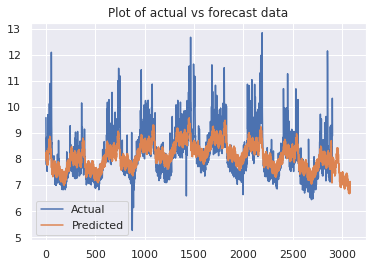

In [30]:
#plot of actual vs predicted data
plt.plot(wiki_data.y)
plt.plot(forecast.yhat)
plt.title('Plot of actual vs forecast data')
plt.legend(['Actual', 'Predicted'])
plt.show();

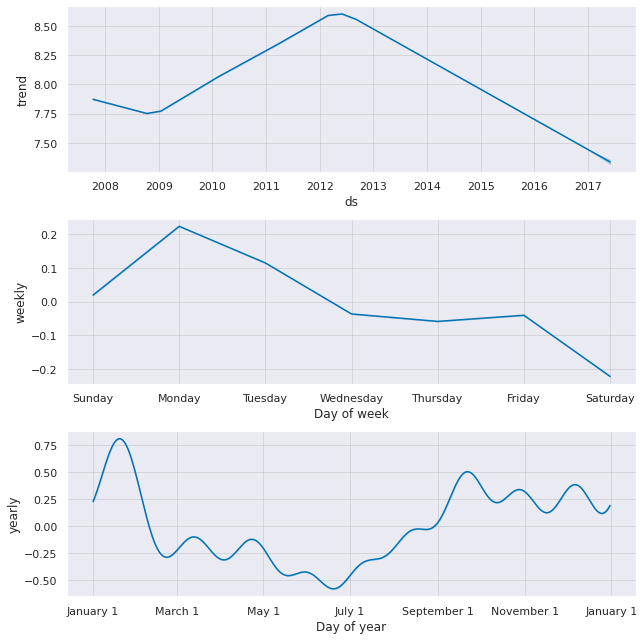

In [32]:
#show the plot components 
prophet_model.plot_components(forecast)
plt.show()

In [33]:
#import necessary packages
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from fbprophet.diagnostics import cross_validation, performance_metrics

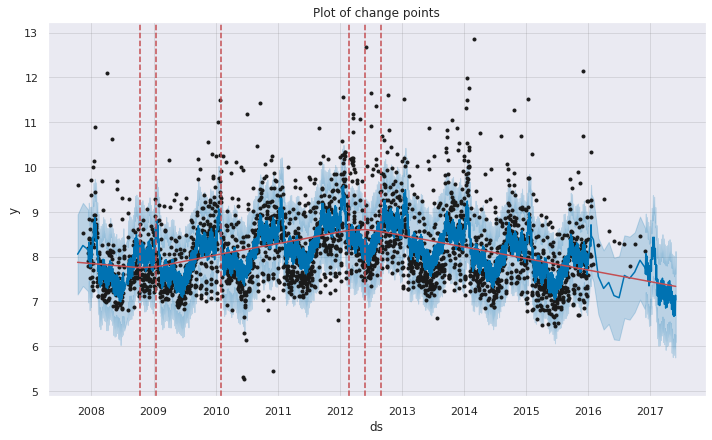

In [38]:
#add changepoints 
fig = prophet_model.plot(forecast)
add_changepoints_to_plot(fig.gca(), prophet_model, forecast)
plt.title('Plot of change points')
plt.show();

In [40]:
#Evaluate your model's performance using cross validation and performance metric
df_cv = cross_validation(prophet_model, initial = '730 days', horizon = '31 days', period= '180 days')
df_cv

INFO:fbprophet:Making 15 forecasts with cutoffs between 2009-12-07 00:00:00 and 2016-10-31 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2009-12-08,8.401499,7.656677,9.179401,7.754910,2009-12-07
1,2009-12-09,8.319712,7.552328,9.010264,8.046870,2009-12-07
2,2009-12-10,8.130874,7.460280,8.837159,10.280039,2009-12-07
3,2009-12-11,8.174591,7.435040,8.869200,8.465057,2009-12-07
4,2009-12-12,7.980281,7.215213,8.642696,8.379539,2009-12-07
...,...,...,...,...,...,...
396,2015-12-06,7.998797,7.041873,8.910418,6.855409,2015-11-06
397,2015-12-07,8.191149,7.307377,9.139257,6.982863,2015-11-06
398,2016-06-01,7.078134,6.168520,7.923567,8.352554,2016-05-04
399,2016-11-01,7.910528,7.024326,8.823175,8.470730,2016-10-31


In [44]:
#compute the performance metric
df_performance = performance_metrics(df_cv)
df_performance.mean()

horizon     17 days 00:00:00
mse                 0.760399
rmse                0.856272
mae                 0.597206
mape               0.0724915
mdape              0.0526313
coverage            0.791001
dtype: object

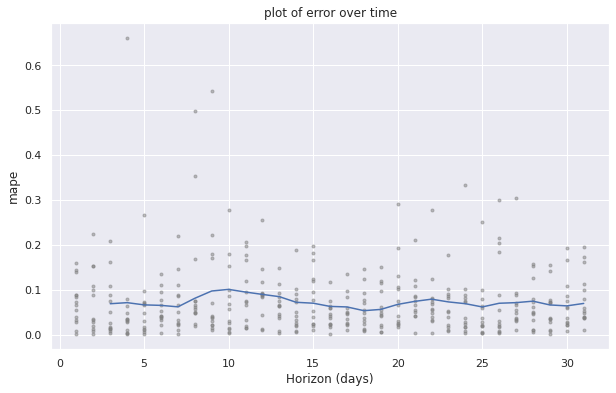

In [48]:
#plotting cross validation metric
plot_cross_validation_metric(df_cv, metric= 'mape')
plt.title('plot of error over time')
plt.show();